# Data Cleaning & Preprocessing
## Overview
This notebook handles data cleaning, preprocessing, and feature engineering for the Olist e-commerce dataset.

## Sections
1. Data Loading
2. Handling Missing Values
3. Data Type Conversion
4. Outlier Detection & Treatment
5. Feature Engineering

## Sections
1. [Setup and Imports](#1-setup-and-imports)
2. [Data Loading and Initial Analysis](#2-data-loading-and-initial-analysis)
3. [Data Cleaning](#3-data-cleaning)
4. [Data Validation](#4-data-validation)
5. [Data Transformation](#5-data-transformation)
6. [Data Export](#6-data-export)

### 1. Setup and Imports
<a id='1-setup-and-imports'></a>

In [59]:
# Import required libraries
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', 100)

# Set style for plots
# Set style and palette for data cleaning
plt.style.use('seaborn-v0_8-whitegrid')  # Clean grid without color background
sns.set_theme(style="whitegrid", 
             rc={'axes.facecolor':'white', 
                 'figure.facecolor':'white'})  # White background
sns.set_palette("Greys")  # Monochromatic, professional look

# Set paths
BASE_DIR = Path.cwd().parent
DATA_RAW = BASE_DIR / 'data' / 'raw'
DATA_PROCESSED = BASE_DIR / 'data' / 'processed'

# Create processed directory if it doesn't exist
os.makedirs(DATA_PROCESSED, exist_ok=True)

# Print configuration
print(f"Current working directory: {Path.cwd()}")
print(f"Data directory (raw): {DATA_RAW}")
print(f"Data directory (processed): {DATA_PROCESSED}")

Current working directory: e:\Customer_Churn_Prediction_and_Retention_Dashboard\notebooks
Data directory (raw): e:\Customer_Churn_Prediction_and_Retention_Dashboard\data\raw
Data directory (processed): e:\Customer_Churn_Prediction_and_Retention_Dashboard\data\processed


### 2. Data Loading and initial analysis
<a id= '2-data-loading-and-initial-analysis'></a>

In [45]:
# Load datasets here
# customers = pd.read_csv('../data/raw/olist_customers_dataset.csv')
# orders = pd.read_csv('../data/raw/olist_orders_dataset.csv')
# order_items = pd.read_csv('../data/raw/olist_order_items_dataset.csv')

In [46]:
## Robust features:-
# error handling
# memory management
# clear documentation
# scalability

In [60]:
# Function to load data with error handling
def load_and_analyze_data(file_name, data_dir=DATA_RAW, verbose=True, show_sample= True, sample_size=5):
    """
    Load a CSV file from the specified directory with error handling and memory optimization.
    Includes sample data display
    
    Parameters:
    - file_name (str): Name of the CSV file to load
    - data_dir (Path): Directory containing the data files
    - verbose (bool): Whether to print loading information
    
    Returns:
    - pd.DataFrame: Loaded dataframe or None if loading fails
    """
    try:
        # create full file path
        file_path = data_dir / file_name

        # print loading message if verbose if True
        if verbose:
            print(f"Loading {file_name}...")
        
        # Initial load with optimized dtypes
        # loading the csv file into pd dataframe
        df = pd.read_csv(file_path)
        
        if verbose:

            # Basic info
            print(f"  Rows: {df.shape[0]:,}")
            print(f"  Columns: {df.shape[1]}")
            print(f"  Memory usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
            # df.memory_usage()--> returns the memory usage of each column in bytes
            # deep=True tells pandas to scan the actual data for accurate memory usage
            # Without deep=True, it only counts references to objects
            
            # Missing value analysis
            missing = df.isnull().sum()
            missing_pct= (missing/ len(df)) * 100
            missing_cols= missing.loc[missing > 0] # Filter to only show columns with missing values
            
            if not missing_cols.empty:
                print("\n Missing values: ")
                # Loop through columns with missing values
                for col in missing_cols.index:
                    # Print column name, count of missing values and percentage
                    print(f"    - {col}: {missing[col]} ({missing_pct[col]:.1f}%)")
            else:
                print("\n No missing values found")

            # show sample if requested
            if show_sample:
                print("\n Sample data:")
                # Display first 5 rows with all columns
                with pd.option_context('display.max_columns', None,
                                     'display.width', 1000,
                                     'display.max_colwidth', 30):
                    display(df.head(sample_size))
            else:
                print("  First 5 columns:", df.columns.tolist()[:5])

            print("=" * 150)

        return df
    
    except FileNotFoundError:
        print(f"Error: File {file_name} not found in {data_dir}")
        return None
    except Exception as e:
        print(f"Error loading {file_name}: {str(e)}")
        return None

# List of all data files to load
data_files = [
    'olist_customers_dataset.csv',
    'olist_geolocation_dataset.csv',
    'olist_order_items_dataset.csv',
    'olist_order_payments_dataset.csv',
    'olist_order_reviews_dataset.csv',
    'olist_orders_dataset.csv',
    'olist_products_dataset.csv',
    'olist_sellers_dataset.csv',
    'product_category_name_translation.csv'
]

print("Starting data loading process...\n")

# Two approaches can be taken to access the data later.
# 1. dictionary--> useful for batch operations
# 2. Individual variables-->  More readability for specific analyses

# 1. Load all datasets into a dictionary
data = {}
for file in data_files:
    df_name = file.split('.')[0].replace('-', '_')
    data[df_name] = load_and_analyze_data(file)

# 2. Make datasets available as individual variables
customers = data['olist_customers_dataset']
geolocation = data['olist_geolocation_dataset']
order_items = data['olist_order_items_dataset']
order_payments = data['olist_order_payments_dataset']
order_reviews = data['olist_order_reviews_dataset']
orders = data['olist_orders_dataset']
products = data['olist_products_dataset']
sellers = data['olist_sellers_dataset']
category_translation = data['product_category_name_translation']

print("\nAll datasets loaded successfully!")

Starting data loading process...

Loading olist_customers_dataset.csv...
  Rows: 99,441
  Columns: 5
  Memory usage: 29.62 MB

 No missing values found

 Sample data:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00...,861eff4711a542e4b93843c6dd...,14409,franca,SP
1,18955e83d337fd6b2def6b18a4...,290c77bc529b7ac935b93aa66c...,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0...,060e732b5b29e8181a18229c7b...,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc635...,259dac757896d24d7702b9acbb...,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e3...,345ecd01c38d18a9036ed96c73...,13056,campinas,SP


Loading olist_geolocation_dataset.csv...
  Rows: 1,000,163
  Columns: 5
  Memory usage: 145.20 MB

 No missing values found

 Sample data:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.55,-46.64,sao paulo,SP
1,1046,-23.55,-46.64,sao paulo,SP
2,1046,-23.55,-46.64,sao paulo,SP
3,1041,-23.54,-46.64,sao paulo,SP
4,1035,-23.54,-46.64,sao paulo,SP


Loading olist_order_items_dataset.csv...
  Rows: 112,650
  Columns: 7
  Memory usage: 39.43 MB

 No missing values found

 Sample data:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792c...,1,4244733e06e7ecb4970a6e2683...,48436dade18ac8b2bce089ec2a...,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a1...,1,e5f2d52b802189ee658865ca93...,dd7ddc04e1b6c2c614352b383e...,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4...,1,c777355d18b72b67abbeef9df4...,5b51032eddd242adc84c38acab...,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038...,1,7634da152a4610f1595efa32f1...,9d7a1d34a5052409006425275b...,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e5...,1,ac6c3623068f30de03045865e4...,df560393f3a51e74553ab94004...,2017-02-13 13:57:51,199.90,18.14


Loading olist_order_payments_dataset.csv...
  Rows: 103,886
  Columns: 5
  Memory usage: 17.81 MB

 No missing values found

 Sample data:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac...,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f...,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e...,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e91...,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489...,1,credit_card,2,128.45


Loading olist_order_reviews_dataset.csv...
  Rows: 99,224
  Columns: 7
  Memory usage: 42.75 MB

 Missing values: 
    - review_comment_title: 87656 (88.3%)
    - review_comment_message: 58247 (58.7%)

 Sample data:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a4...,73fc7af87114b39712e6da79b0...,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d564...,a548910a1c6147796b98fdf73d...,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d13228...,f9e4b658b201a9f2ecdecbb34b...,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb...,658677c97b385a9be170737859...,5,NaN,Recebi bem antes do prazo ...,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a3...,8e6bfb81e283fa7e4f11123a3f...,5,NaN,Parabéns lojas lannister a...,2018-03-01 00:00:00,2018-03-02 10:26:53


Loading olist_orders_dataset.csv...
  Rows: 99,441
  Columns: 8
  Memory usage: 58.97 MB

 Missing values: 
    - order_approved_at: 160 (0.2%)
    - order_delivered_carrier_date: 1783 (1.8%)
    - order_delivered_customer_date: 2965 (3.0%)

 Sample data:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f...,9ef432eb6251297304e76186b1...,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150...,b0830fb4747a6c6d20dea0b8c8...,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf0...,41ce2a54c0b03bf3443c3d931a...,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97...,f88197465ea7920adcdbec7375...,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb557...,8ab97904e6daea8866dbdbc4fb...,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Loading olist_products_dataset.csv...
  Rows: 32,951
  Columns: 9
  Memory usage: 6.79 MB

 Missing values: 
    - product_category_name: 610 (1.9%)
    - product_name_lenght: 610 (1.9%)
    - product_description_lenght: 610 (1.9%)
    - product_photos_qty: 610 (1.9%)
    - product_weight_g: 2 (0.0%)
    - product_length_cm: 2 (0.0%)
    - product_height_cm: 2 (0.0%)
    - product_width_cm: 2 (0.0%)

 Sample data:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657e...,perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea64...,artes,44.00,276.00,1.00,1000.00,30.00,18.00,20.00
2,96bd76ec8810374ed1b65e2919...,esporte_lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e23...,bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff19...,utilidades_domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00


Loading olist_sellers_dataset.csv...
  Rows: 3,095
  Columns: 4
  Memory usage: 0.66 MB

 No missing values found

 Sample data:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632c...,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c...,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0...,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58...,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b8...,12914,braganca paulista,SP


Loading product_category_name_translation.csv...
  Rows: 71
  Columns: 2
  Memory usage: 0.01 MB

 No missing values found

 Sample data:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor



All datasets loaded successfully!


### Insights:

1. **CRITICAL DATASETS FOR CHURN PREDICTION:**
 - ***olist_orders_dataset***: Core for purchase frequency and recency
 - ***olist_customers_dataset***: Customer information and segmentation
 - ***olist_order_payments_dataset***: Payment behavior and value
 - ***olist_order_reviews_dataset***: Customer satisfaction metrics

2. **KEY CHURN INDICATORS:**
- **High-Impact Columns:**
    - ***order_status (orders):*** Identifies completed/canceled orders
    - ***order_purchase_timestamp (orders):*** For recency/frequency analysis
    - ***payment_value (payments):*** Customer lifetime value
    - ***review_score (reviews):*** Direct satisfaction metric
    - ***order_delivered_customer_date (orders):*** Delivery performance

3. **DATA QUALITY ISSUES:**
- **Review Data:**
    - ***review_comment_title:*** 88.3% missing
    - ***review_comment_message:*** 58.7% missing
    - ***Action:*** Consider dropping these columns or treating as optional feedback

- **Order Data:**
    - ***Minimal missing dates*** (0.2-3.0%)
    - ***Action:*** Can be safely imputed (separate logic)

- **Product Data:**
    - ***1.9% missing category/description data***
    - ***Minimal missing dimensions (0.006%)***
    - ***Action:*** Simple imputation for missing values

4. **MEMORY USAGE/ OPTIMIZATION:**
- Total memory usage appears reasonable
- Consider downcasting numeric columns where possible
- Convert appropriate columns to category dtype



### 3. Data Cleaning
<a id= '3-data-cleaning'></a>

TASKS TO DO:-
- Handle missing values
- Standardize data types
- clean text data
- Handle duplicates

**TASK_01**

### Summary of missing values

In [61]:
# Create a summary of missing values
missing_summary = []

# Loop through each dataset in the 'data' dictionary
for name, df in data.items():
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100

    # filter only the columns with missing values
    missing_cols = missing.loc[missing > 0]

    # Loop through columns with missing values    
    for col, count in missing_cols.items():
        missing_summary.append({
            'dataset': name,
            'column': col,
            'missing_count': count,
            'missing_pct': missing_pct[col],
            'dtype': df[col].dtype
        })

# Convert to DataFrame and sort by missing percentage
missing_df = pd.DataFrame(missing_summary).sort_values('missing_pct', ascending=False)
missing_df

,dataset,column,missing_count,missing_pct,dtype
0,olist_order_reviews_dataset,review_comment_title,87656,88.34,object
1,olist_order_reviews_dataset,review_comment_message,58247,58.70,object
4,olist_orders_dataset,order_delivered_customer_date,2965,2.98,object
6,olist_products_dataset,product_name_lenght,610,1.85,float64
5,olist_products_dataset,product_category_name,610,1.85,object
7,olist_products_dataset,product_description_lenght,610,1.85,float64
8,olist_products_dataset,product_photos_qty,610,1.85,float64
3,olist_orders_dataset,order_delivered_carrier_date,1783,1.79,object
2,olist_orders_dataset,order_approved_at,160,0.16,object
9,olist_products_dataset,product_weight_g,2,0.01,float64


### Categorizing columns based on their missing values handling approach

- **Drop columns with high missing values**
  - review_comment_title (88.3% missing)
  - review_comment_message (58.7% missing)- may be flagged as unknown
- **Impute columns with low missing values**
  - Columns Needing Special Handling
     -  Date columns (need logical imputation)
     - Product categories (need contextual imputation)
  - Standard imputation
    - For numerical continuous columns:
      -  if the data is normally distributed: impute with mean
      -  if the data is skewed: impute with median
    - If the data is categorical: impute with mode


### Handling the missing values

#### 1. Handle order_reviews_dataset

In [62]:
def clean_order_reviews(df):
    """Handle missing values in order reviews with business context"""
    df_clean = df.copy()
    
    # Drop review_comment_title (88.3% missing)
    if 'review_comment_title' in df_clean.columns:
        df_clean = df_clean.drop(columns= ['review_comment_title'])
    
    # For review_comment_message (58.7% missing), keep but mark as None
    if 'review_comment_message' in df_clean.columns:
        df_clean['review_comment_message'] = df_clean['review_comment_message'].replace({np.nan: None})

        # None- represents that the field was optional, the customer chose not to leave a comment (the data is truly missing, not an empty string)
    
    return df_clean

#### 2. Handle products_dataset

In [63]:
def clean_products(df):
    """
    Handle missing values in products dataset with business context.
    
    Business Context:
    - Product information is critical for understanding customer preferences
    - Missing values can affect recommendation systems and inventory management
    - We'll use different strategies based on the importance and nature of each column
    """
    df_clean = df.copy()
    
    # 1. Product Category (1.9% missing)
    # Business Impact: Critical for product analysis and recommendations
    # Decision: Marked as 'unknown' to maintain data integrity
    if 'product_category_name' in df_clean.columns:
        df_clean['product_category_name'] = df_clean['product_category_name'].fillna('unknown')
    
    # 2. Product Name Length (1.9% missing)
    # Business Impact: Moderate - used for UX analysis (readability, mobile optimization, conversion impact)
    # Decision: Fill with median as length is a numeric metric (median is not affected by extremely long or short product names)
    if 'product_name_lenght' in df_clean.columns:
        df_clean['product_name_lenght'] = df_clean['product_name_lenght'].fillna(
            df_clean['product_name_lenght'].median()
        )
    
    # 3. Product Description Length (1.9% missing)
    # Business Impact: Moderate - affects search relevance
    # Decision: Fill with median as length is a numeric metric
    if 'product_description_lenght' in df_clean.columns:
        df_clean['product_description_lenght'] = df_clean['product_description_lenght'].fillna(
            df_clean['product_description_lenght'].median()
        )
    
    # 4. Product Photos Quantity (1.9% missing)
    # Business Impact: Affects conversion rates
    # Decision: Fill with median as it's a count
    if 'product_photos_qty' in df_clean.columns:
        df_clean['product_photos_qty'] = df_clean['product_photos_qty'].fillna(
            df_clean['product_photos_qty'].median()
        )
    
    # 5. Product Dimensions (0.006% missing)
    # Business Impact: Critical for shipping cost calculation
    # Decision: Fill with median as these are physical measurements
    dimension_cols = [
        'product_weight_g',
        'product_length_cm',
        'product_height_cm',
        'product_width_cm'
    ]
    for col in dimension_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    
    # 6. Product Category Name in English
    # Business Impact: Important for analysis
    # Decision: Map from original category or mark as 'unknown'
    if 'product_category_name_english' in df_clean.columns:
        df_clean['product_category_name_english'] = df_clean['product_category_name_english'].fillna('unknown')
    
    # Verify all columns are handled
    remaining_missing = df_clean.isnull().sum()
    if remaining_missing.sum() > 0:
        print("Warning: Some columns still have missing values after cleaning:")
        print(remaining_missing.loc[remaining_missing > 0])
    
    return df_clean

#### Insights:
#### Importance of missing value analysis in products dataset:
- Product category:
  - Critical for segmentation and analysis
  - ***Impact on churn: High- affects product selection and recommendations***
- Name/ Description length:
  - Affects search relevance
  - Impact on churn: Medium- affects product discoverability
- Product Photos:
  - Affects conversion rates
  - Impact on churn: Medium- affects customer trust
- Dimensions:
  - Critical for shipping
  - ***Impact on churn: High- affects delivery time and costs***
- English category names:
  - Needed for analysis
  - Impact on churn: Low-mainly for reporting

#### 3. Handle orders_dataset

In [51]:
# Missing values are in the columns order_approved_at, order_delivered_carrier_date, order_delivered_customer_date.
# To handle/ impute the mull values in column 'order_approved_at':
#       1. find the general trend of approval time in most of the orders (purchase time- approved at time)
#       2. Then replace the null values with logic:
#                 purchase_time + median time taken for approval= approved_at time (median time in minutes)


##### Analyze the approval time

Approval Time Statistics (in minutes):
Min: 0.00
25th percentile: 12.90
Median: 20.60
75th percentile: 874.85
95th percentile: 2907.82
Max: 270550.83


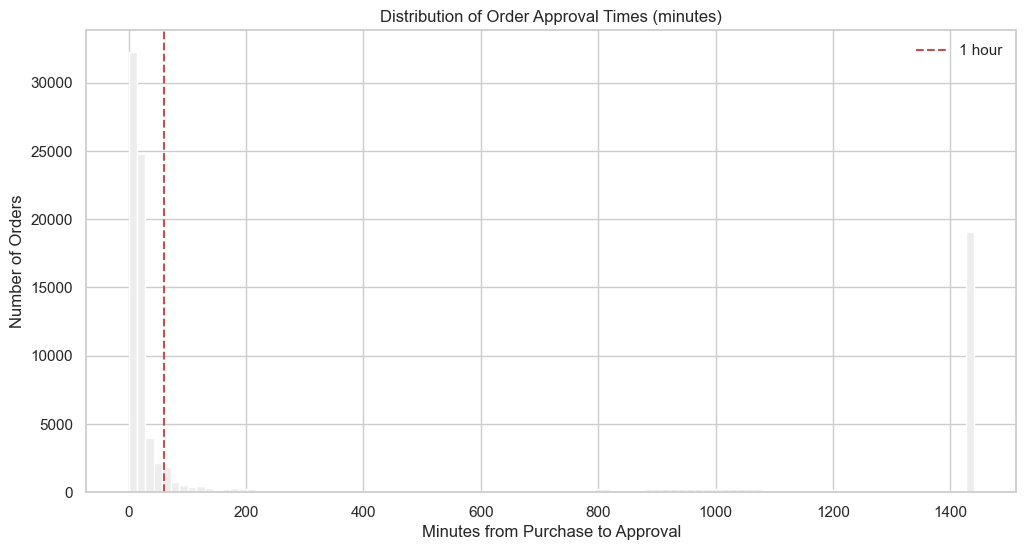

In [64]:
# Calculate time difference between order approval and purchase
if 'order_approved_at' in orders.columns:

    # Convert to datetime if not already
    orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
    orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
    
    # Calculate approval time in minutes
    orders['approval_time_minutes'] = (
        orders['order_approved_at'] - orders['order_purchase_timestamp']
    ).dt.total_seconds() / 60
    
    # Remove any negative times (data errors)
    approval_times = orders[orders['approval_time_minutes'] >= 0]['approval_time_minutes']
    
    # Print statistics
    print("Approval Time Statistics (in minutes):")
    print(f"Min: {approval_times.min():.2f}")
    print(f"25th percentile: {approval_times.quantile(0.25):.2f}")
    print(f"Median: {approval_times.median():.2f}")
    print(f"75th percentile: {approval_times.quantile(0.75):.2f}")
    print(f"95th percentile: {approval_times.quantile(0.95):.2f}")
    print(f"Max: {approval_times.max():.2f}")
    
    # Plot distribution
    plt.figure(figsize=(12, 6))
    plt.hist(approval_times.clip(upper=1440), bins=100)  # Clip at 24 hours(1440 min) for better visualization
    plt.title('Distribution of Order Approval Times (minutes)')
    plt.xlabel('Minutes from Purchase to Approval')
    plt.ylabel('Number of Orders')
    plt.axvline(x=60, color='r', linestyle='--', label='1 hour') # dashed line at 60 min to highlight how much orders are approved in 1 hour
    plt.legend()
    plt.show()

##### Analyzing the delivery times


Approval to Carrier Time (hours):
Min: -4109.26
25th percentile: 20.98
Median: 43.58
75th percentile: 85.80
95th percentile: 194.04

Carrier to Customer Time (hours):
Min: -386.31
25th percentile: 98.39
Median: 170.39
75th percentile: 288.70
95th percentile: 580.97


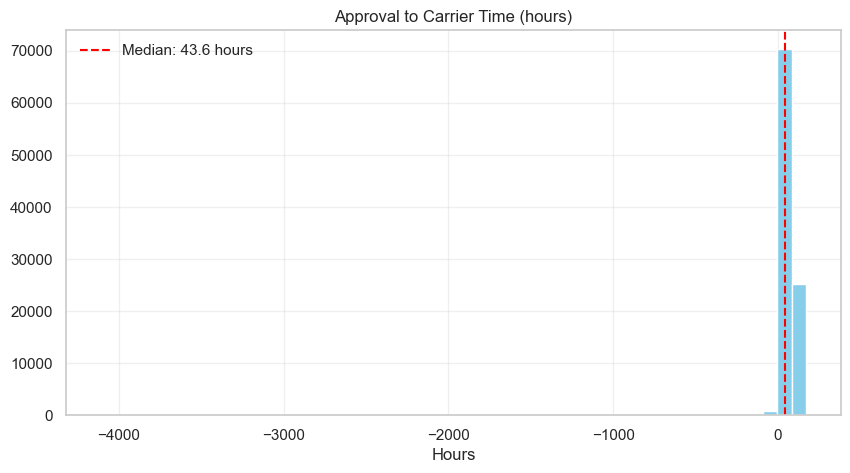

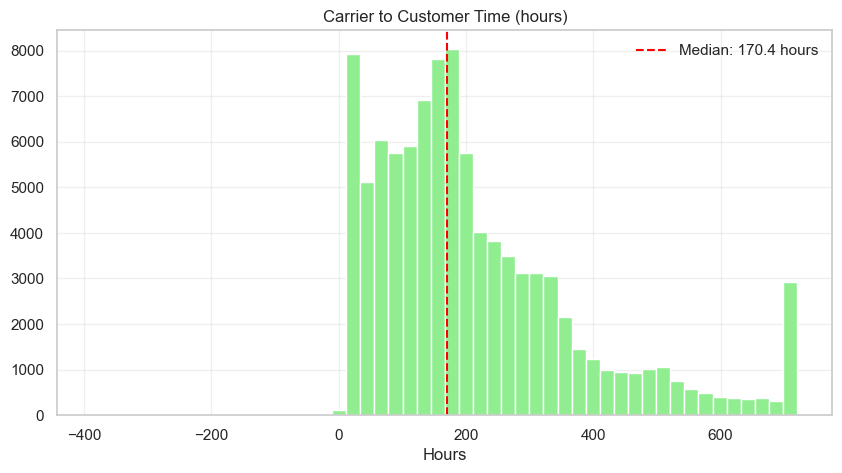

In [65]:
def analyze_delivery_times_hours(orders_df):
    """Analyze delivery time patterns in hours for more precision"""
    
    # Make a copy to avoid SettingWithCopyWarning
    df = orders_df.copy()
    
    # Convert all date columns to datetime
    date_cols = ['order_purchase_timestamp', 'order_approved_at', 
                'order_delivered_carrier_date', 'order_delivered_customer_date']
    
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col])

    # Filter only delivered orders with complete delivery data
    delivered = df[
        (df['order_status'] == 'delivered') & 
        (df['order_delivered_carrier_date'].notna()) &
        (df['order_delivered_customer_date'].notna()) &
        (df['order_approved_at'].notna())
    ].copy()
    
    # Calculate time intervals in hours
    delivered['approval_to_carrier_hours'] = (
        delivered['order_delivered_carrier_date'] - delivered['order_approved_at']
    ).dt.total_seconds() / 3600  # Convert to hours
    
    delivered['carrier_to_customer_hours'] = (
        delivered['order_delivered_customer_date'] - delivered['order_delivered_carrier_date']
    ).dt.total_seconds() / 3600  # Convert to hours
    
    # Print statistics for approval to carrier
    print("\nApproval to Carrier Time (hours):")
    print(f"Min: {delivered['approval_to_carrier_hours'].min():.2f}")
    print(f"25th percentile: {delivered['approval_to_carrier_hours'].quantile(0.25):.2f}")
    print(f"Median: {delivered['approval_to_carrier_hours'].median():.2f}")
    print(f"75th percentile: {delivered['approval_to_carrier_hours'].quantile(0.75):.2f}")
    print(f"95th percentile: {delivered['approval_to_carrier_hours'].quantile(0.95):.2f}")
    
    # Print statistics for carrier to customer
    print("\nCarrier to Customer Time (hours):")
    print(f"Min: {delivered['carrier_to_customer_hours'].min():.2f}")
    print(f"25th percentile: {delivered['carrier_to_customer_hours'].quantile(0.25):.2f}")
    print(f"Median: {delivered['carrier_to_customer_hours'].median():.2f}")
    print(f"75th percentile: {delivered['carrier_to_customer_hours'].quantile(0.75):.2f}")
    print(f"95th percentile: {delivered['carrier_to_customer_hours'].quantile(0.95):.2f}")
    
     # Plot distributions - First plot
    plt.figure(figsize=(10, 5))
    plt.hist(delivered['approval_to_carrier_hours'].clip(upper=168), bins=50, color='skyblue')
    plt.axvline(delivered['approval_to_carrier_hours'].median(), color='red', linestyle='--', 
               label=f"Median: {delivered['approval_to_carrier_hours'].median():.1f} hours")
    plt.title('Approval to Carrier Time (hours)')
    plt.xlabel('Hours')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Second plot
    plt.figure(figsize=(10, 5))
    plt.hist(delivered['carrier_to_customer_hours'].clip(upper=720), bins=50, color='lightgreen')
    plt.axvline(delivered['carrier_to_customer_hours'].median(), color='red', linestyle='--',
               label=f"Median: {delivered['carrier_to_customer_hours'].median():.1f} hours")
    plt.title('Carrier to Customer Time (hours)')
    plt.xlabel('Hours')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return (
        delivered['approval_to_carrier_hours'].median(),
        delivered['carrier_to_customer_hours'].median()
    )

# Run the analysis
median_approval_to_carrier_hrs, median_carrier_to_customer_hrs = analyze_delivery_times_hours(orders)

#### Imputing the null values using the above analysis


In [66]:
def clean_orders(df):
    """Handle missing values in orders with business context"""
    df_clean = df.copy()
    
    # Convert to datetime
    date_cols = ['order_purchase_timestamp', 'order_approved_at', 
                'order_delivered_carrier_date', 'order_delivered_customer_date',
                'order_estimated_delivery_date']
    
    for col in date_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_datetime(df_clean[col])
    
    # 1. Handle order_approved_at (0.2% missing) # median approval time is 21 minutes
    if 'order_approved_at' in df_clean.columns:
        mask = df_clean['order_approved_at'].isna()
        df_clean.loc[mask, 'order_approved_at'] = (
            df_clean.loc[mask, 'order_purchase_timestamp'] + 
            pd.Timedelta(minutes=21)
        )
    
    # 2. Handle missing carrier date (1.8% missing)
    if 'order_delivered_carrier_date' in df_clean.columns:
        mask = df_clean['order_delivered_carrier_date'].isna()
        df_clean.loc[mask, 'order_delivered_carrier_date'] = (
            df_clean.loc[mask, 'order_approved_at'] + 
            pd.Timedelta(hours=44)  # Rounded from 43.58 hours (from our analysis)
        )
    
    # 3. Handle missing customer delivery date (3.0% missing)
    if 'order_delivered_customer_date' in df_clean.columns:
        mask = df_clean['order_delivered_customer_date'].isna()
        df_clean.loc[mask, 'order_delivered_customer_date'] = (
            df_clean.loc[mask, 'order_delivered_carrier_date'] + 
            pd.Timedelta(days= 7)  # Rounded from 7.1 days (170.39 hours)
        )
    
    return df_clean

#### Verification and report

In [55]:
# original copies of the datasets (with missing values)
# original_orders= orders.copy()
# original_products= products.copy()
# original_customers = customers.copy()

In [67]:
# 1. Running the cleaning functions and storing in variables
cleaned_orders= clean_orders(orders)
cleaned_products= clean_products(products)
cleaned_reviews = clean_order_reviews(order_reviews)

In [68]:
# 1. Run the cleaning functions
cleaned_orders = clean_orders(orders)
cleaned_products = clean_products(products)
cleaned_reviews = clean_order_reviews(order_reviews)  # This will work now

# 2. Verify the results
print("Cleaning complete!")
print(f"Original orders shape: {orders.shape}, Cleaned: {cleaned_orders.shape}")
print(f"Original products shape: {products.shape}, Cleaned: {cleaned_products.shape}")
print(f"Original reviews shape: {order_reviews.shape}, Cleaned: {cleaned_reviews.shape}")

Cleaning complete!
Original orders shape: (99441, 9), Cleaned: (99441, 9)
Original products shape: (32951, 9), Cleaned: (32951, 9)
Original reviews shape: (99224, 7), Cleaned: (99224, 6)


In [69]:
# 2. Prepare your cleaned datasets with descriptions
cleaned_datasets = {
    'orders': (
        cleaned_orders, 
        "Contains order information with imputed dates for approval and delivery"
    ),
    'products': (
        cleaned_products, 
        "Product catalog with imputed missing categories and dimensions"
    ),
    'order_reviews': (
        cleaned_reviews, 
        "Customer reviews with handled missing comments"
    )
}

In [70]:

# 3. Define the cleaning actions that were taken (how missing / null values are handled)
cleaning_actions = {
    'orders': {
        'order_approved_at': 'Imputed with order_purchase_timestamp + 21 minutes',
        'order_delivered_carrier_date': 'Imputed with order_approved_at + 44 hours',
        'order_delivered_customer_date': 'Imputed with order_delivered_carrier_date + 7 days'
    },
    'products': {
        'product_category_name': "Imputed with 'unknown'",
        'product_name_lenght': 'Imputed with median',
        'product_description_lenght': 'Imputed with median',
        'product_photos_qty': 'Imputed with median',
        'product_weight_g': 'Imputed with median',
        'product_length_cm': 'Imputed with median',
        'product_height_cm': 'Imputed with median',
        'product_width_cm': 'Imputed with median'
    },
    'order_reviews': {
        'review_comment_title': 'Dropped column (high missingness)',
        'review_comment_message': 'Dropped column (high missingness)'
    }
}

In [71]:
# Generating the reports
def verify_cleaned_datasets(datasets, cleaning_actions):
    """
    Verify cleaned datasets and generate a report
    
    Parameters:
    - datasets: Dict of {'dataset_name': (df, description)}  
    - cleaning_actions: Dict of {'dataset_name': {column: action}}
    """
    print("="*150)
    print("CLEANED DATASETS VERIFICATION REPORT".center(100))
    print("="*150 + "\n")
    
    all_clean = True
    
    for name, (df, description) in datasets.items():
        # Check for any missing values
        missing = df.isnull().sum()
        missing_cols = missing.loc[missing > 0]
        
        print(f"📜 {name.upper()}")
        print("-" * 150)
        print(f"Description: {description}")
        print(f"Total Rows: {len(df):,}")
        print(f"Total Columns: {len(df.columns)}")
        
        if missing_cols.empty:
            print("\n✅ No missing values found")
        else:
            all_clean = False
            print("\n⚠️  Missing Values Found:")
            print("-" * 80)
            print(f"{'Column':<40} {'Missing Count':<15} {'% Missing':<10}")
            print("-" * 80)
            for col, count in missing_cols.items():
                pct = (count / len(df)) * 100
                print(f"{col:<40} {count:<15,} {pct:.2f}%")
        
        # Show actions taken if available
        if name in cleaning_actions:
            print("\n✅ Cleaning Actions Performed:")
            print("-" * 100)
            for col, action in cleaning_actions[name].items():
                print(f"• {col}: {action}")
        
        print("\n" + "="*150 + "\n")
    
    # Final summary
    print("\n" + "="*70)
    print("VERIFICATION SUMMARY".center(50))
    print("="*70)
    if all_clean:
        print("✅ ALL DATASETS ARE CLEAN - NO MISSING VALUES FOUND")
    else:
        print("⚠️  SOME DATASETS STILL HAVE MISSING VALUES")
    print("="*70)


In [72]:

verify_cleaned_datasets(cleaned_datasets, cleaning_actions)

                                CLEANED DATASETS VERIFICATION REPORT                                

📜 ORDERS
------------------------------------------------------------------------------------------------------------------------------------------------------
Description: Contains order information with imputed dates for approval and delivery
Total Rows: 99,441
Total Columns: 9

⚠️  Missing Values Found:
--------------------------------------------------------------------------------
Column                                   Missing Count   % Missing 
--------------------------------------------------------------------------------
approval_time_minutes                    160             0.16%

✅ Cleaning Actions Performed:
----------------------------------------------------------------------------------------------------
• order_approved_at: Imputed with order_purchase_timestamp + 21 minutes
• order_delivered_carrier_date: Imputed with order_approved_at + 44 hours
• order_delivered_c

In [73]:
# Insights:
# From the report, it is clear that all the null values are handled
# Except two columns such as "approval_time_minutes" which is created for analysis purposes,
# and "review_comment_message" which will be marked as None for future analysis 


In [74]:
# 1. Create copies of the original data
# orders, products, order_reviews are the variables from data loading section
orders_cleaned = orders.copy()
products_cleaned = products.copy()
reviews_cleaned = order_reviews.copy()

# 2. Update with cleaned columns
# For orders
for col in ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']:
    if col in cleaned_orders.columns:
        orders_cleaned[col] = cleaned_orders[col] # cleaned_orders (from the missing values handling section)

# For products
for col in ['product_category_name', 'product_name_lenght', 'product_description_lenght',
            'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    if col in cleaned_products.columns:
        products_cleaned[col] = cleaned_products[col]

# For reviews
if 'review_comment_title' in cleaned_reviews.columns:
    reviews_cleaned['review_comment_title'] = cleaned_reviews['review_comment_title']
if 'review_comment_message' in cleaned_reviews.columns:
    reviews_cleaned['review_comment_message'] = cleaned_reviews['review_comment_message']

# Now you have:
# orders_cleaned - Original data with cleaned columns
# products_cleaned - Original data with cleaned columns
# reviews_cleaned - Original data with cleaned columns

💡

In [75]:
# use orders_cleaned, products_cleaned, reviews_cleaned datasets for further analysis
# and the rest of the datasets as given in the original data

In [76]:
# Just a quick check
orders_cleaned.isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
approval_time_minutes            160
dtype: int64

In [77]:
# Dropping the approval_time_minutes (which was created only for analysis purposes before while handling missing values)
orders_cleaned.drop(columns= 'approval_time_minutes', inplace= True)

In [78]:
orders_cleaned.isnull().sum() # thus verified

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [79]:
products_cleaned.isnull().sum() # thus verified

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [80]:
reviews_cleaned.isnull().sum() 

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [83]:
# Dropping the column review_comment_title since that might have been missed previously in the functions
reviews_cleaned.drop(columns=['review_comment_title'], inplace=True)

In [ ]:
reviews_cleaned.isnull().sum() # thus verified

review_id                      0
order_id                       0
review_score                   0
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

### Standardize the data types

#### Checking the data types

In [91]:
# Data Loading
'''
customers = data['olist_customers_dataset']
geolocation = data['olist_geolocation_dataset']
order_items = data['olist_order_items_dataset']
order_payments = data['olist_order_payments_dataset']
order_reviews = data['olist_order_reviews_dataset']
orders = data['olist_orders_dataset']
products = data['olist_products_dataset']
sellers = data['olist_sellers_dataset']
category_translation = data['product_category_name_translation']'''
# Replacing the 
# orders--> orders_cleaned
# products--> products_cleaned
# order_reviews--> reviews_cleaned

"\ncustomers = data['olist_customers_dataset']\ngeolocation = data['olist_geolocation_dataset']\norder_items = data['olist_order_items_dataset']\norder_payments = data['olist_order_payments_dataset']\norder_reviews = data['olist_order_reviews_dataset']\norders = data['olist_orders_dataset']\nproducts = data['olist_products_dataset']\nsellers = data['olist_sellers_dataset']\ncategory_translation = data['product_category_name_translation']"

In [92]:
# Create a dictionary to map DataFrames to their names
datasets = {
    'Customers': customers,
    'Geolocation': geolocation,
    'Order Items': order_items,
    'Order Payments': order_payments,
    'Order Reviews': reviews_cleaned,  # Using the cleaned version
    'Orders': orders_cleaned,          # Using the cleaned version
    'Products': products_cleaned,      # Using the cleaned version
    'Sellers': sellers,
    'Category Translation': category_translation
}

# Function to check data types
def check_all_dtypes(datasets_dict):
    """Display data types for all datasets"""
    for name, df in datasets_dict.items():
        print(f"\n{'='*50}")
        print(f"{name} - Shape: {df.shape}")
        print('-'*50)
        print(df.dtypes)
        print(f"\nMissing values:\n{df.isnull().sum()}")
        print(f"\n{'-'*30}")

# Check data types for all datasets
check_all_dtypes(datasets)


Customers - Shape: (99441, 5)
--------------------------------------------------
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Missing values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

------------------------------

Geolocation - Shape: (1000163, 5)
--------------------------------------------------
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Missing values:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

--------------------------

In [93]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [98]:
# Standardization of Data types 
def standardize_dtypes(datasets_dict):
    """Standardize data types across all datasets"""

    # 1. customers
    datasets_dict['Customers']['customer_zip_code_prefix'] = datasets_dict['Customers']['customer_zip_code_prefix'].astype(str)

    # 2. Geolocation
    datasets_dict['Geolocation']['geolocation_zip_code_prefix'] = datasets_dict['Geolocation']['geolocation_zip_code_prefix'].astype(str)

    # 3. Order Items
    datasets_dict['Order Items']['shipping_limit_date'] = pd.to_datetime(datasets_dict['Order Items']['shipping_limit_date'])

    # 4. Order Payments
    datasets_dict['Order Payments']['payment_type'] = datasets_dict['Order Payments']['payment_type'].astype('category')
    
    # category is a pandas data type used for categorical data, which has a fixed set of possible values. Here's why it's useful:

    # Memory Efficiency: Categorical data uses less memory than strings.
    # Performance: Faster operations like sorting and grouping.
    # Validation: Ensures only valid categories are used.
    # In this case, payment_type likely has values like 'credit_card', 'debit_card', etc. 
    
    # Converting it to a category is efficient because:

      # After converting to category
      # Internally stored as integers with a mapping to the actual strings
      # More memory efficient and faster

    # 5. Order Reviews
    datasets_dict['Order Reviews']['review_creation_date'] = pd.to_datetime(datasets_dict['Order Reviews']['review_creation_date'])
    datasets_dict['Order Reviews']['review_answer_timestamp'] = pd.to_datetime(datasets_dict['Order Reviews']['review_answer_timestamp'])
    datasets_dict['Order Reviews']['review_score'] = pd.Categorical(datasets_dict['Order Reviews']['review_score'], 
                                                                        categories=[1, 2, 3, 4, 5], 
                                                                        ordered=True
                                                                    )
    # Difference between .astype('category') and pd.Categorical():
    # .astype('category') : Automatically determines categories from the data; no control over the category order.
    # pd.Categorical() : Explicit control over the categories;  eg, here 1<2<3<4<5
    #                    We can set the order of categories, can also include categories that are not present in the data.
    #                    Better for ordinal data (like ratings).


    # 6. Orders
    datasets_dict['Orders']['order_estimated_delivery_date'] = pd.to_datetime(datasets_dict['Orders']['order_estimated_delivery_date'])
        
    # 7. Products
    int_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
    for col in int_cols:
        datasets_dict['Products'][col] = datasets_dict['Products'][col].astype('Int64')  # Capital I for nullable integer(Can store integers AND missing values (NaN))

    # 8. Sellers
    datasets_dict['Sellers']['seller_zip_code_prefix'] = datasets_dict['Sellers']['seller_zip_code_prefix'].astype(str)
    
    return datasets_dict

        

In [99]:
# Apply the standardization
standardized_datasets = standardize_dtypes(datasets)

# Verify the changes
for name, df in standardized_datasets.items():
    print(f"\n{name} - Data Types:")
    print(df.dtypes)


Customers - Data Types:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix    object
customer_city               object
customer_state              object
dtype: object

Geolocation - Data Types:
geolocation_zip_code_prefix     object
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Order Items - Data Types:
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

Order Payments - Data Types:
order_id                  object
payment_sequential         int64
payment_type            category
payment_installments       int64
payment_value            float64
dtype: object

Order Reviews - Data Types:
revie

### Clean text data

In [100]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Pá...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super recomendo essa loja!",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


#### Why clean Text data for Churn Prediction?
- **1. Review comments (Most valuable):**
  - Why? Direct customer feedback about their experience
  - Impact on Churn: Negative reviews often precede churn
  - ***Columns to Clean:***
    - review_comment_message (Order Reviews)
    - review_score (already handled as categorical)

- **NOTE:**
  - Eventhough I attempted to clean the review_comment_message column, it requires sentiment analysis, which is not within the scope of this project. This can be done in the future if needed. Instead, ***the numeric column review_score*** is used to identify churn. 


- **2. Product Categories (Important)**
  - Why? Certain product categories may have higher return/churn rates
    - Impact on Churn: Identifies problematic product lines
    - ***Columns to Clean:***
    - product_category_name (Products)

- **NOTE:**
  - Since, the column ***"product_category_name"*** from the products is already in english translation in the product_category_name_translation table, I will not clean it.
  - Join with the translation table during feature engineering.

In [ ]:
category_translation # product_category_name_translation dataset

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


#### Text Data that are intentionally ignored(With Reasons)
| Column | Reason for Exclusion |
|--------|----------------------|
| Customer Names | No predictive value for churn |
| Addresses | Already captured in location-based features |
| Seller Names | Use seller_id as categorical variable instead |
| Product Names | Too many unique values, use categories instead |

In [115]:
def clean_text_for_churn(datasets_dict):
    """Only clean text that needs cleaning (reviews)"""
    # Clean review comments (only text that needs processing)

    if 'Order Reviews' in datasets_dict: # first search the name in dict
        reviews = datasets_dict['Order Reviews'] # storing that dataset separately
        if 'review_comment_message' in reviews.columns: # fetching only the required column
            reviews['review_comment_clean'] = (
                reviews['review_comment_message']
                .fillna('')
                .astype(str)
                .str.lower()
                .str.normalize('NFKD')
                .str.replace(r'[^\w\s]', ' ', regex=True)
                .str.replace(r'\s+', ' ', regex=True)
                .str.strip()
            )
    
    return datasets_dict


In [116]:
# Apply only necessary cleaning
datasets_cleaned = clean_text_for_churn(standardized_datasets)

In [ ]:
datasets_cleaned['Order Reviews'].head(20) # thus verified but needed sentiment analysis later to use it for churn prediction

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_clean
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,2018-01-18,2018-01-18 21:46:59,
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,2018-03-10,2018-03-11 03:05:13,
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,2018-02-17,2018-02-18 14:36:24,
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,recebi bem antes do prazo estipulado
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Pá...,2018-03-01,2018-03-02 10:26:53,parabe ns lojas lannister adorei comprar pela internet seguro e pra tico parabe ns a todos feliz...
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,None,2018-04-13,2018-04-16 00:39:37,
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,None,2017-07-16,2017-07-18 19:30:34,
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,None,2018-08-14,2018-08-14 21:36:06,
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,None,2017-05-17,2017-05-18 12:05:37,
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta...,2018-05-22,2018-05-23 16:45:47,aparelho eficiente no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta ...


### Handle duplicates

In [ ]:
#

In [ ]:
def check_duplicates(datasets_dict):
    """Check for duplicate rows in each dataset"""
    duplicates = {}
    for name, df in datasets_dict.items():
        # Check for exact duplicate rows
        dup_rows = df[df.duplicated(keep=False)]
        # Check for duplicate primary keys
        if 'order_id' in df.columns:
            dup_pk = df[df.duplicated('order_id', keep=False)]
        elif 'product_id' in df.columns:
            dup_pk = df[df.duplicated('product_id', keep=False)]
        else:
            dup_pk = pd.DataFrame()
        
        duplicates[name] = {
            'total_rows': len(df),
            'exact_duplicates': len(dup_rows),
            'duplicate_pks': len(dup_pk),
            'duplicate_examples': dup_pk.head(2).to_dict('records') if not dup_pk.empty else None
        }
    
    return pd.DataFrame(duplicates).T

# Check for duplicates
duplicates_report = check_duplicates(datasets_cleaned)
duplicates_report

In [ ]:


# 4. Handle Duplicates
def remove_duplicates(df):
    # Your code to handle duplicates
    return df

# 5. Data Validation
def validate_data(df):
    # Your validation checks
    return df

# 6. Data Transformation
def transform_data(df):
    # Your transformation code
    return df

# 7. Apply All Steps to Each Dataset
def process_dataset(df):
    df = standardize_dtypes(df)
    df = clean_text_data(df)
    df = remove_duplicates(df)
    df = validate_data(df)
    df = transform_data(df)
    return df

# 8. Process All Datasets
final_orders = process_dataset(cleaned_orders)
final_products = process_dataset(cleaned_products)
final_reviews = process_dataset(cleaned_reviews)

# 9. Save Final Datasets
final_orders.to_csv('data/processed/final_orders.csv', index=False)
final_products.to_csv('data/processed/final_products.csv', index=False)
final_reviews.to_csv('data/processed/final_reviews.csv', index=False)